In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

In [2]:
#import Fashion MNIST dataset
# about dataset : 70000 grayscale image and 10 catogries. dim.=28x28
fashion = tf.keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

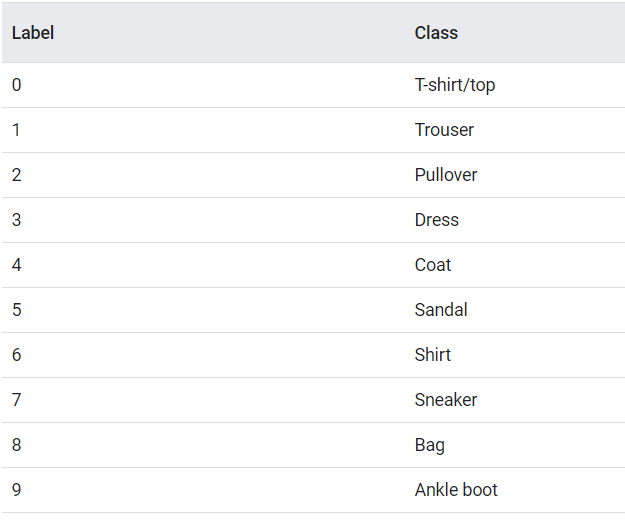

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

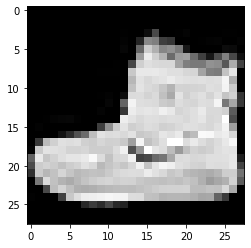

In [8]:
plt.figure()
plt.imshow(train_images[0],cmap='gray' )
plt.show()

In [9]:
# the values are get between 0-1 
train_images = train_images/255
test_images = test_images/255

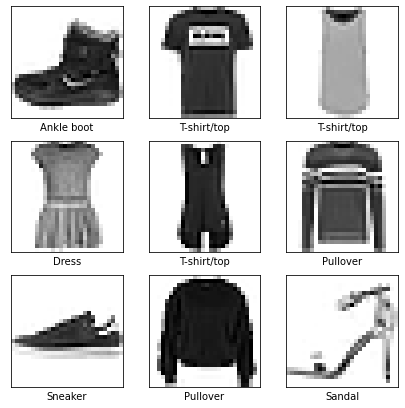

In [10]:
plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### build model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax
from tensorflow.keras.callbacks import EarlyStopping


In [12]:
model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(10) # dataset has 10 categories
])

In [13]:
# SparseCategoricalCrossentropy
# etikentler ve tahminler arasindaki capraz entropi kaybini hesaplar
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
earlyStoping = EarlyStopping(monitor='loss', mode= 'min', verbose=1, patience= 1)

#### train model

In [15]:
model.fit(train_images, train_labels, epochs=5, callbacks=earlyStoping)

Epoch 1/5
1875/1875 [==============================] - 2s 823us/step - loss: 0.4935 - accuracy: 0.8272
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3706 - accuracy: 0.8656
Epoch 3/5
1875/1875 [==============================] - 2s 868us/step - loss: 0.3334 - accuracy: 0.8793
Epoch 4/5
1875/1875 [==============================] - 2s 875us/step - loss: 0.3108 - accuracy: 0.88590s - l
Epoch 5/5
1875/1875 [==============================] - 2s 854us/step - loss: 0.2958 - accuracy: 0.8909


In [16]:
loss = model.history.history['loss']

In [17]:
loss= np.array(loss)

<AxesSubplot:>

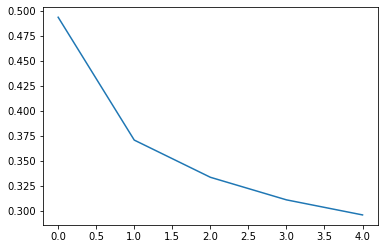

In [18]:
sbn.lineplot(data=loss)

In [19]:
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3426 - accuracy: 0.8793

Test accuracy: 0.8792999982833862


In [20]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [21]:

predictions = probability_model.predict(test_images)

In [22]:
predictions[0]

array([3.0997999e-06, 2.1547564e-08, 1.0410433e-06, 2.8541418e-08,
       6.2659700e-07, 5.4652277e-02, 3.9200618e-06, 6.5313324e-02,
       2.9117233e-04, 8.7973452e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:4.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1.2])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

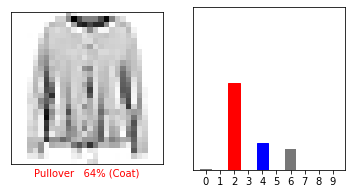

In [26]:
i = 25
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [27]:
# use trained model


In [28]:
img = test_images[1]
img.shape

(28, 28)

In [29]:
img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05098039, 0.2627451 , 0.        , 0.        , 0.        ,
        0.        , 0.19607843, 0.14901961, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03137255, 0.47058824, 0.81960784,
        0.88627451, 0.96862745, 0.92941176, 1.        , 1.        ,
        1.        , 0.96862745, 0.93333333, 0.92156863, 0.6745098 ,
        0.28235294, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5372549 , 0.9372549 , 0.98823529, 0.95294118,
        0.91764706, 0.89803922, 0.93333333, 0.95686275, 0.96470588,
        0.94117647, 0.9019

In [30]:
img = np.expand_dims(img, 0)

In [31]:
img.shape

(1, 28, 28)

In [32]:
img

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.05098039, 0.2627451 , 0.        , 0.        , 0.        ,
         0.        , 0.19607843, 0.14901961, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.03137255, 0.47058824, 0.81960784,
         0.88627451, 0.96862745, 0.92941176, 1.        , 1.        ,
         1.        , 0.96862745, 0.93333333, 0.92156863, 0.6745098 ,
         0.28235294, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.5372549 , 0.9372549 , 0.98823529, 0.95294118,
         0.91764706, 0.89803922, 0.93333333, 0.95686275, 0.96470588,
         0.

In [33]:
pre_single = probability_model.predict(img)

In [34]:
pre_single

array([[5.3148222e-04, 1.2619642e-09, 9.9560779e-01, 6.6268186e-08,
        2.1346209e-03, 5.4297469e-12, 1.7260337e-03, 2.7937789e-12,
        3.4834795e-08, 8.5350531e-13]], dtype=float32)

In [35]:
np.argmax(pre_single)

2

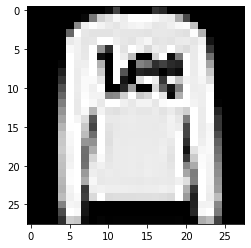

In [36]:
plt.imshow(img[0], cmap='gray')

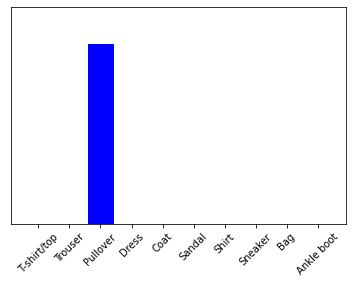

In [37]:
plot_value_array(1, pre_single[0], test_labels) 
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [38]:
#real life example


In [39]:
import cv2 as cv
demo =cv.imread('demo.jpg',0)
def showimg(img):
    cv.imshow('demo', img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [40]:
demore =cv.resize(demo,[28,28])

In [41]:
showimg(demore)

In [42]:
demore.shape


(28, 28)

In [43]:
demore = np.expand_dims(demore,0)

In [44]:
demore.shape

(1, 28, 28)

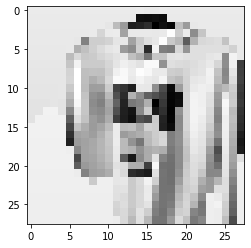

In [45]:
plt.imshow(demore[0], cmap='gray')

In [46]:
pre_single2 = probability_model.predict(demore)

In [47]:
np.argmax(pre_single2)

8

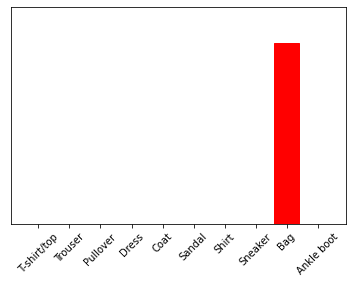

In [48]:
plot_value_array(1, pre_single2[0], test_labels) 
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
# yanlis tahmin

In [49]:
# real life example

In [51]:
def example (img):
#   cv.imshow('demo', img)
#   cv.waitKey(0)
#   cv.destroyAllWindows()
    img =cv.resize(img,[28,28])
    img = np.expand_dims(img,0)
#   plt.imshow(img[0], cmap='gray')
    pre_single = probability_model.predict(img)
    print(np.argmax(pre_single))
    print(pre_single)
    plot_value_array(1, pre_single[0], test_labels) 
    _ = plt.xticks(range(10), class_names, rotation=45)
    plt.show()


5
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


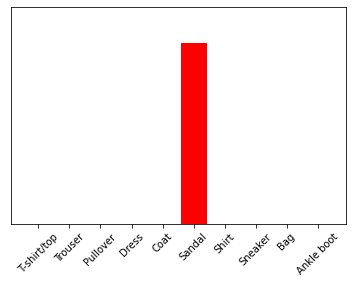

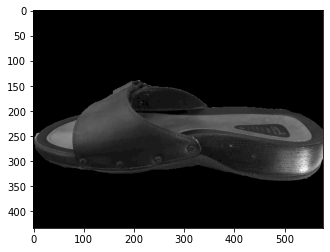

In [61]:
demo =cv.imread('terlik.png',0)
example(demo)
plt.imshow(demo, cmap='gray')

In [60]:
img2 = cv.imread('shoes.png',0)

5
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


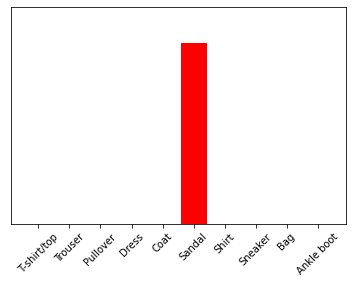

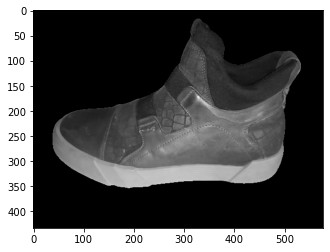

In [59]:
example(img2)
plt.imshow(img2, cmap = 'gray')